# University of Mannheim
## Data Mining I -- Group Project
### Wine Quality Prediction
#### Team members:
* Anna-Lena Blinken
* Max Darmstadt
* Nicolas Hautschek
* Erik Penther
* Nicolas Fürhaupter

## Importing Libraries and Data

In [1]:
#from google.colab import drive
#drive.mount('/gdrive')
#%cd /gdrive

In [2]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Import wine data

wine_data = pd.read_csv('../winequalityN.csv')
wine_data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## Visualize and Analyse Data

In [4]:
# Print wine data info

wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
# Analyse the data by its mean etc.

wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


### Null Values

In [6]:
# Check data for null values

wine_data.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [7]:
# Check class distribution

wine_data.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

### Class Distribution

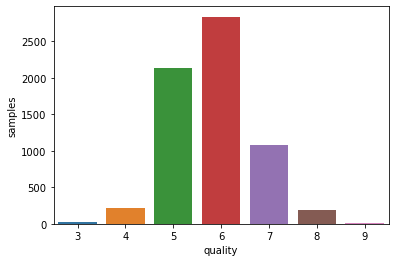

In [8]:
# Visualize class distribution

sns.barplot(x=wine_data.quality.value_counts().index, y=wine_data.quality.value_counts())
plt.ylabel('samples')
plt.xlabel('quality')
plt.show()

In [9]:
# Turn 10 classes into 3 classes

wine_data['quality'] = wine_data.quality.apply(lambda x: 2 if x>6 else (1 if x> 4 else 0))

In [10]:
# Check class distribution

wine_data.quality.value_counts()

1    4974
2    1277
0     246
Name: quality, dtype: int64

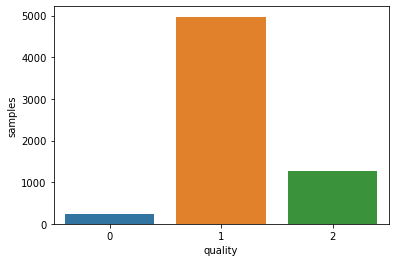

In [11]:
# Visualize class distribution

sns.barplot(x=wine_data.quality.value_counts().index, y=wine_data.quality.value_counts())
plt.ylabel('samples')
plt.xlabel('quality')
plt.show()

In [12]:
# Turn 10 classes into 2 classes

wine_data_2 = pd.read_csv('../winequalityN.csv')
wine_data_2['quality'] = wine_data_2.quality.apply(lambda x: 2 if x>5 else 0)

In [13]:
# Check class distribution

wine_data_2.quality.value_counts()

2    4113
0    2384
Name: quality, dtype: int64

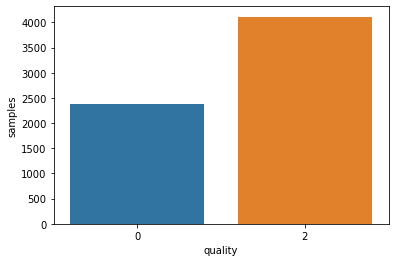

In [14]:
# Visualize class distribution

sns.barplot(x=wine_data_2.quality.value_counts().index, y=wine_data_2.quality.value_counts())
plt.ylabel('samples')
plt.xlabel('quality')
plt.show()

### Check duplicates

In [15]:
# Count duplicates and remove duplicates
display(len(wine_data.index))
wine_data.drop_duplicates()
display(len(wine_data.index))

6497

6497

### Unique Values

In [16]:
# Count uniques values of each column
wine_data.nunique()

type                      2
fixed acidity           106
volatile acidity        187
citric acid              89
residual sugar          316
chlorides               214
free sulfur dioxide     135
total sulfur dioxide    276
density                 998
pH                      108
sulphates               111
alcohol                 111
quality                   3
dtype: int64

### Distribution of Values

<AxesSubplot:>

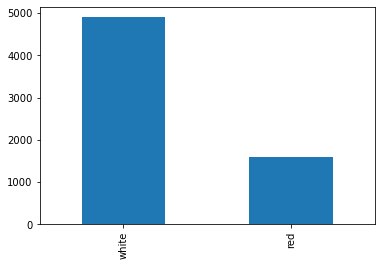

In [17]:
# Plot histogram for each categorical column

wine_data['type'].value_counts().plot(kind='bar')

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

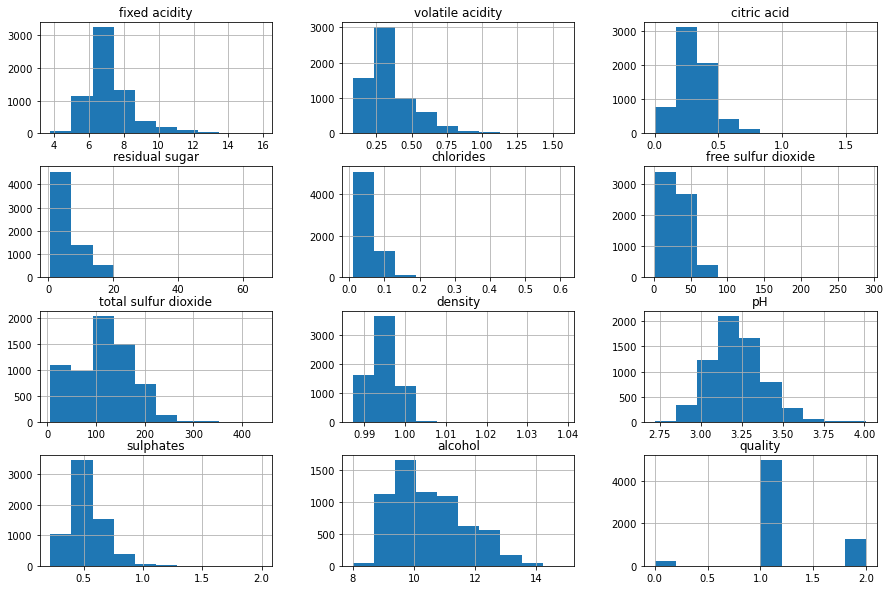

In [18]:
# Plot histogram for each numerical column

wine_data.hist(figsize=(15, 10))

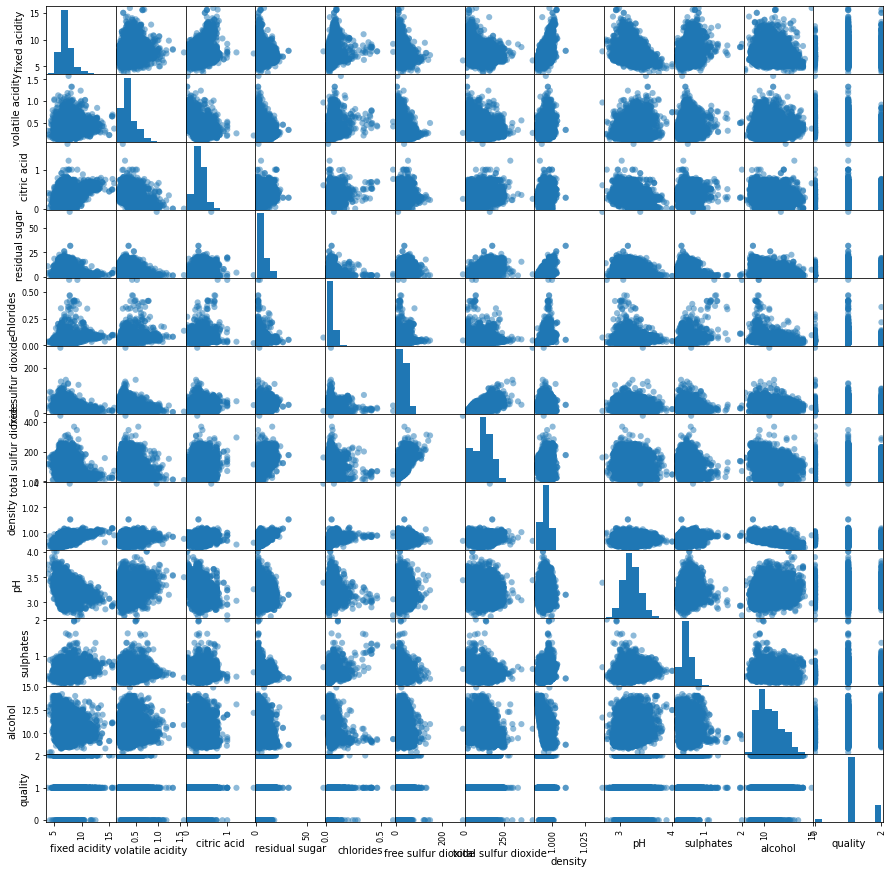

In [19]:
# Scatterplots

pd.plotting.scatter_matrix(wine_data, figsize=(15, 15), s=150);

## Data Cleaning

In [20]:
# Delete Null-Values 

wine_data = wine_data.dropna(axis=0, how="any", thresh=None, subset=None, inplace=False)
display(wine_data.isnull().sum())
display(len(wine_data.index))

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

6463

In [21]:
# One Hot Encoder for the attribute type

from sklearn import preprocessing

# show data before preprocessing
display(wine_data.head())

# create the OrdinalEncoder
ordinal_encoder = preprocessing.OrdinalEncoder()

# preprocess the features Product and ZipCode
wine_data = wine_data.copy()
wine_data[['type']] = ordinal_encoder.fit_transform(wine_data[['type']])

# show the results
wine_data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1.0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,1.0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,1.0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,1.0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,1.0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


In [22]:
# Normalisation of numerical values

# show data before preprocessing
display(wine_data.head())

# create the normaliser
scaler = preprocessing.MinMaxScaler()

# preprocess the features ItemsBought and ItemsReturned
wine_data = wine_data.copy()
wine_data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']] = scaler.fit_transform(wine_data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']])

# show the results
display(wine_data.head())

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1.0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,1.0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,1.0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,1.0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,1.0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1.0,0.264463,0.126667,0.216867,0.308282,0.059801,0.152778,0.377880,0.267785,0.217054,0.129213,0.115942,1
1,1.0,0.206612,0.146667,0.204819,0.015337,0.066445,0.045139,0.290323,0.132832,0.449612,0.151685,0.217391,1
2,1.0,0.355372,0.133333,0.240964,0.096626,0.068106,0.100694,0.209677,0.154039,0.418605,0.123596,0.304348,1
3,1.0,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.414747,0.163678,0.364341,0.101124,0.275362,1
4,1.0,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.414747,0.163678,0.364341,0.101124,0.275362,1


In [23]:
# Deleting outliers

wine_data_columns = ['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

# Identify outliers
for x in wine_data_columns:
    for y in x:
        q75,q25 = np.percentile(wine_data.loc[:,x],[75,25])
        intr_qr = q75-q25

        max = q75+(1.5*intr_qr)
        min = q25-(1.5*intr_qr)

        wine_data.loc[wine_data[x] < min,x] = np.nan
        wine_data.loc[wine_data[x] > max,x] = np.nan
        
display(wine_data.isnull().sum())

# Drop outliers
wine_data = wine_data.dropna(axis=0, how="any", thresh=None, subset=None, inplace=False)
display(wine_data.isnull().sum())
display(len(wine_data.index))

type                      0
fixed acidity           356
volatile acidity        374
citric acid             507
residual sugar          117
chlorides               284
free sulfur dioxide      62
total sulfur dioxide     10
density                   3
pH                       73
sulphates               191
alcohol                   3
quality                   0
dtype: int64

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

4999

## Separation of Features and Target Variable and Train/Test Split

In [24]:
# Seperation of features and the target variable in two different data frames

features = wine_data.drop(columns='quality')
display(features.head())

target = wine_data.drop(columns=['type', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'])
display(target.head())
target = target['quality'].ravel()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1,1.0,0.206612,0.146667,0.204819,0.015337,0.066445,0.045139,0.290323,0.132832,0.449612,0.151685,0.217391
2,1.0,0.355372,0.133333,0.240964,0.096626,0.068106,0.100694,0.209677,0.154039,0.418605,0.123596,0.304348
3,1.0,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.414747,0.163678,0.364341,0.101124,0.275362
4,1.0,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.414747,0.163678,0.364341,0.101124,0.275362
5,1.0,0.355372,0.133333,0.240964,0.096626,0.068106,0.100694,0.209677,0.154039,0.418605,0.123596,0.304348


,quality
1,1
2,1
3,1
4,1
5,1


In [25]:
# Train test split

from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    features, target,test_size=0.2, random_state=42, stratify=target)

### Neural Network

In [26]:
#pip install pytorch-lightning  

In [27]:
# import pytorch

import torch
import pytorch_lightning as pl
import torch.nn as nn
from torch.nn import functional as F
import torchmetrics
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

In [28]:
feature_train, feature_validation, target_train, target_validation = \
    train_test_split(data_train, target_train, random_state=42, stratify=target_train, test_size = 0.2)

In [29]:
# convert data to tensors and create datasets
train_dataset = TensorDataset(torch.FloatTensor(feature_train.to_numpy()), torch.LongTensor(target_train))
validation_dataset = TensorDataset(torch.FloatTensor(feature_validation.to_numpy()), torch.LongTensor(target_validation))
test_dataset = TensorDataset(torch.FloatTensor(data_test.to_numpy()), torch.LongTensor(target_test))

# create dataloaders which will handle the batching
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
validation_loader = DataLoader(dataset=validation_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=True)

In [30]:
num_features = feature_train.shape[1]

class WinePredictionModel1(pl.LightningModule):
    
    def __init__(self):
        super().__init__()
        self.my_model = nn.Sequential(
            nn.Linear(num_features, 100),
            nn.ReLU(),
            nn.Linear(100, 50),
            nn.ReLU(),
            nn.Linear(50, 3)
        )
        self.train_f1 = torchmetrics.F1(num_classes=3, average='macro')
        self.valid_f1 = torchmetrics.F1(num_classes=3, average='macro')
        self.test_f1 = torchmetrics.F1(num_classes=3, average='macro')

    def forward(self, x):
        logits = self.my_model(x)
        return logits
    
    def make_step(self, x, y):        
        logits = self.forward(x)
        loss = F.cross_entropy(logits, y)
        predictions = torch.argmax(torch.softmax(logits, -1), -1)
        return logits, loss, predictions
        
    
    def training_step(self, batch, batch_idx):
        x, y = batch
        logits, loss, predictions = self.make_step(x,y)
        self.train_f1(predictions, y)
        return {'loss' : loss}
    
    def training_epoch_end(self, training_step_outputs):
        avg_train_loss = torch.stack([x['loss'] for x in training_step_outputs]).mean()
        avg_train_f1 = self.train_f1.compute() 
        
        self.log("loss/train", avg_train_loss)
        self.log("f1/train", avg_train_f1)
        
        print('training loss at epoch ' + str(self.current_epoch) + ': ' + str(avg_train_loss.item()))
        
    def validation_step(self, batch, batch_idx):
        x, y = batch
        logits, loss, predictions = self.make_step(x, y)
        
        self.valid_f1(predictions, y)
        return {'val_loss' : loss} 
    
    def validation_epoch_end(self, validation_step_outputs):
        avg_val_loss = torch.stack([x['val_loss'] for x in validation_step_outputs]).mean()
        avg_val_f1 = self.valid_f1.compute()
        
        self.log("loss/validation", avg_val_loss)
        self.log("f1/validation", avg_val_f1)
        
        print('validation f1 at epoch ' + str(self.current_epoch) + ': ' + str(avg_val_f1.item()))

    def test_step(self, batch, batch_idx):
        x, y = batch
        logits, loss, predictions = self.make_step(x, y)
        test_f1_batch = self.test_f1(predictions, y)
        return test_f1_batch
    
    def test_epoch_end(self, test_step_outputs):
        avg_test_f1 = self.test_f1.compute()        
        self.log('f1/test', avg_test_f1)        
        return avg_test_f1

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=1e-3, weight_decay=1e-4)
        return optimizer

In [31]:
num_features = feature_train.shape[1]

class WinePredictionModel2(pl.LightningModule):
    
    def __init__(self):
        super().__init__()
        self.my_model = nn.Sequential(
            nn.Linear(num_features, 200),
            nn.ReLU(),
            nn.Linear(200, 100),
            nn.ReLU(),
            nn.Linear(100, 50),
            nn.ReLU(),
            nn.Linear(50, 3)
        )
        self.train_f1 = torchmetrics.F1(num_classes=3, average='macro')
        self.valid_f1 = torchmetrics.F1(num_classes=3, average='macro')
        self.test_f1 = torchmetrics.F1(num_classes=3, average='macro')

    def forward(self, x):
        logits = self.my_model(x)
        return logits
    
    def make_step(self, x, y):        
        logits = self.forward(x)
        loss = F.cross_entropy(logits, y)
        predictions = torch.argmax(torch.softmax(logits, -1), -1)
        return logits, loss, predictions
        
    
    def training_step(self, batch, batch_idx):
        x, y = batch
        logits, loss, predictions = self.make_step(x,y)
        self.train_f1(predictions, y)
        return {'loss' : loss}
    
    def training_epoch_end(self, training_step_outputs):
        avg_train_loss = torch.stack([x['loss'] for x in training_step_outputs]).mean()
        avg_train_f1 = self.train_f1.compute() 
        
        self.log("loss/train", avg_train_loss)
        self.log("f1/train", avg_train_f1)
        
        print('training loss at epoch ' + str(self.current_epoch) + ': ' + str(avg_train_loss.item()))
        
    def validation_step(self, batch, batch_idx):
        x, y = batch
        logits, loss, predictions = self.make_step(x, y)
        
        self.valid_f1(predictions, y)
        return {'val_loss' : loss} 
    
    def validation_epoch_end(self, validation_step_outputs):
        avg_val_loss = torch.stack([x['val_loss'] for x in validation_step_outputs]).mean()
        avg_val_f1 = self.valid_f1.compute()
        
        self.log("loss/validation", avg_val_loss)
        self.log("f1/validation", avg_val_f1)
        
        print('validation f1 at epoch ' + str(self.current_epoch) + ': ' + str(avg_val_f1.item()))

    def test_step(self, batch, batch_idx):
        x, y = batch
        logits, loss, predictions = self.make_step(x, y)
        test_f1_batch = self.test_f1(predictions, y)
        return test_f1_batch
    
    def test_epoch_end(self, test_step_outputs):
        avg_test_f1 = self.test_f1.compute()        
        self.log('f1/test', avg_test_f1)        
        return avg_test_f1

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=1e-3, weight_decay=1e-4)
        return optimizer

In [32]:
num_features = feature_train.shape[1]

class WinePredictionModel3(pl.LightningModule):
    
    def __init__(self):
        super().__init__()
        self.my_model = nn.Sequential(
            nn.Linear(num_features, 400),
            nn.ReLU(),
            nn.Linear(400, 200),
            nn.ReLU(),
            nn.Linear(200, 100),
            nn.ReLU(),
            nn.Linear(100, 50),
            nn.ReLU(),
            nn.Linear(50, 3)
        )
        self.train_f1 = torchmetrics.F1(num_classes=3, average='macro')
        self.valid_f1 = torchmetrics.F1(num_classes=3, average='macro')
        self.test_f1 = torchmetrics.F1(num_classes=3, average='macro')

    def forward(self, x):
        logits = self.my_model(x)
        return logits
    
    def make_step(self, x, y):        
        logits = self.forward(x)
        loss = F.cross_entropy(logits, y)
        predictions = torch.argmax(torch.softmax(logits, -1), -1)
        return logits, loss, predictions
        
    
    def training_step(self, batch, batch_idx):
        x, y = batch
        logits, loss, predictions = self.make_step(x,y)
        self.train_f1(predictions, y)
        return {'loss' : loss}
    
    def training_epoch_end(self, training_step_outputs):
        avg_train_loss = torch.stack([x['loss'] for x in training_step_outputs]).mean()
        avg_train_f1 = self.train_f1.compute() 
        
        self.log("loss/train", avg_train_loss)
        self.log("f1/train", avg_train_f1)
        
        print('training loss at epoch ' + str(self.current_epoch) + ': ' + str(avg_train_loss.item()))
        
    def validation_step(self, batch, batch_idx):
        x, y = batch
        logits, loss, predictions = self.make_step(x, y)
        
        self.valid_f1(predictions, y)
        return {'val_loss' : loss} 
    
    def validation_epoch_end(self, validation_step_outputs):
        avg_val_loss = torch.stack([x['val_loss'] for x in validation_step_outputs]).mean()
        avg_val_f1 = self.valid_f1.compute()
        
        self.log("loss/validation", avg_val_loss)
        self.log("f1/validation", avg_val_f1)
        
        print('validation f1 at epoch ' + str(self.current_epoch) + ': ' + str(avg_val_f1.item()))

    def test_step(self, batch, batch_idx):
        x, y = batch
        logits, loss, predictions = self.make_step(x, y)
        test_f1_batch = self.test_f1(predictions, y)
        return test_f1_batch
    
    def test_epoch_end(self, test_step_outputs):
        avg_test_f1 = self.test_f1.compute()        
        self.log('f1/test', avg_test_f1)        
        return avg_test_f1

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=1e-3, weight_decay=1e-4)
        return optimizer

In [33]:
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.callbacks.early_stopping import EarlyStopping

# set a seed for all libraries such as random, numpy random etc
pl.seed_everything(42, workers=True)
model1 = WinePredictionModel1()


checkpoint_callback = ModelCheckpoint(dirpath='./checkpoints', monitor="f1/validation")
early_stop_callback = EarlyStopping(monitor="f1/validation", patience=10, mode="max")

trainer = pl.Trainer(deterministic=True, 
                     max_epochs=30,
                     callbacks=[checkpoint_callback, early_stop_callback])

trainer.fit(model1, train_loader, validation_loader)

Global seed set to 42
/opt/anaconda3/lib/python3.8/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:446: UserWarning: Checkpoint directory ./checkpoints exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs

  | Name     | Type       | Params
----------------------------------------
0 | my_model | Sequential | 6.5 K 
1 | train_f1 | F1         | 0     
2 | valid_f1 | F1         | 0     
3 | test_f1  | F1         | 0     
----------------------------------------
6.5 K     Trainable params
0         Non-trainable params
6.5 K     Total params
0.026     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

/opt/anaconda3/lib/python3.8/site-packages/pytorch_lightning/trainer/data_loading.py:376: UserWarning: Your val_dataloader has `shuffle=True`, it is best practice to turn this off for val/test/predict dataloaders.
  rank_zero_warn(
/opt/anaconda3/lib/python3.8/site-packages/pytorch_lightning/trainer/data_loading.py:105: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
Global seed set to 42


validation f1 at epoch 0: 0.2956521809101105


/opt/anaconda3/lib/python3.8/site-packages/pytorch_lightning/trainer/data_loading.py:105: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Training: -1it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

validation f1 at epoch 0: 0.28734928369522095
training loss at epoch 0: 0.7924697399139404


Validating: 0it [00:00, ?it/s]

validation f1 at epoch 1: 0.2867194414138794
training loss at epoch 1: 0.6501190066337585


Validating: 0it [00:00, ?it/s]

validation f1 at epoch 2: 0.28648772835731506
training loss at epoch 2: 0.6342028975486755


Validating: 0it [00:00, ?it/s]

validation f1 at epoch 3: 0.2863672971725464
training loss at epoch 3: 0.6126835346221924


Validating: 0it [00:00, ?it/s]

validation f1 at epoch 4: 0.2870212197303772
training loss at epoch 4: 0.5926758050918579


Validating: 0it [00:00, ?it/s]

validation f1 at epoch 5: 0.2887132167816162
training loss at epoch 5: 0.5859629511833191


Validating: 0it [00:00, ?it/s]

validation f1 at epoch 6: 0.2999727725982666
training loss at epoch 6: 0.577693521976471


Validating: 0it [00:00, ?it/s]

validation f1 at epoch 7: 0.31626367568969727
training loss at epoch 7: 0.5714955925941467


Validating: 0it [00:00, ?it/s]

validation f1 at epoch 8: 0.3235805332660675
training loss at epoch 8: 0.5669057965278625


Validating: 0it [00:00, ?it/s]

validation f1 at epoch 9: 0.3324735760688782
training loss at epoch 9: 0.5643883347511292


Validating: 0it [00:00, ?it/s]

validation f1 at epoch 10: 0.33934223651885986
training loss at epoch 10: 0.5596387386322021


Validating: 0it [00:00, ?it/s]

validation f1 at epoch 11: 0.3426012396812439
training loss at epoch 11: 0.5564242005348206


Validating: 0it [00:00, ?it/s]

validation f1 at epoch 12: 0.34731823205947876
training loss at epoch 12: 0.5540077686309814


Validating: 0it [00:00, ?it/s]

validation f1 at epoch 13: 0.35142982006073
training loss at epoch 13: 0.5521935224533081


Validating: 0it [00:00, ?it/s]

validation f1 at epoch 14: 0.35302120447158813
training loss at epoch 14: 0.5490800738334656


Validating: 0it [00:00, ?it/s]

validation f1 at epoch 15: 0.3542167842388153
training loss at epoch 15: 0.5495085716247559


Validating: 0it [00:00, ?it/s]

validation f1 at epoch 16: 0.358732670545578
training loss at epoch 16: 0.5457760095596313


Validating: 0it [00:00, ?it/s]

validation f1 at epoch 17: 0.3628622889518738
training loss at epoch 17: 0.5452470183372498


Validating: 0it [00:00, ?it/s]

validation f1 at epoch 18: 0.3649293780326843
training loss at epoch 18: 0.5423554182052612


Validating: 0it [00:00, ?it/s]

validation f1 at epoch 19: 0.3711128830909729
training loss at epoch 19: 0.541736364364624


Validating: 0it [00:00, ?it/s]

validation f1 at epoch 20: 0.3731842339038849
training loss at epoch 20: 0.5403181314468384


Validating: 0it [00:00, ?it/s]

validation f1 at epoch 21: 0.37467098236083984
training loss at epoch 21: 0.5388897061347961


Validating: 0it [00:00, ?it/s]

validation f1 at epoch 22: 0.3745368719100952
training loss at epoch 22: 0.5382422804832458


Validating: 0it [00:00, ?it/s]

validation f1 at epoch 23: 0.37483319640159607
training loss at epoch 23: 0.5363165140151978


Validating: 0it [00:00, ?it/s]

validation f1 at epoch 24: 0.37782013416290283
training loss at epoch 24: 0.5340257287025452


Validating: 0it [00:00, ?it/s]

validation f1 at epoch 25: 0.3788931965827942
training loss at epoch 25: 0.5353744029998779


Validating: 0it [00:00, ?it/s]

validation f1 at epoch 26: 0.3793027997016907
training loss at epoch 26: 0.5336894392967224


Validating: 0it [00:00, ?it/s]

validation f1 at epoch 27: 0.38133102655410767
training loss at epoch 27: 0.5380076169967651


Validating: 0it [00:00, ?it/s]

validation f1 at epoch 28: 0.3828663229942322
training loss at epoch 28: 0.536461353302002


Validating: 0it [00:00, ?it/s]

validation f1 at epoch 29: 0.38313913345336914
training loss at epoch 29: 0.5327880382537842


In [34]:
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.callbacks.early_stopping import EarlyStopping

# set a seed for all libraries such as random, numpy random etc
pl.seed_everything(42, workers=True)
model2 = WinePredictionModel2()


checkpoint_callback = ModelCheckpoint(dirpath='./checkpoints', monitor="f1/validation")
early_stop_callback = EarlyStopping(monitor="f1/validation", patience=10, mode="max")

trainer = pl.Trainer(deterministic=True, 
                     max_epochs=30,
                     callbacks=[checkpoint_callback, early_stop_callback])

trainer.fit(model2, train_loader, validation_loader)

Global seed set to 42
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs

  | Name     | Type       | Params
----------------------------------------
0 | my_model | Sequential | 27.9 K
1 | train_f1 | F1         | 0     
2 | valid_f1 | F1         | 0     
3 | test_f1  | F1         | 0     
----------------------------------------
27.9 K    Trainable params
0         Non-trainable params
27.9 K    Total params
0.112     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 42


validation f1 at epoch 0: 0.11965812742710114


Training: -1it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

validation f1 at epoch 0: 0.3243992328643799
training loss at epoch 0: 0.7799094319343567


Validating: 0it [00:00, ?it/s]

validation f1 at epoch 1: 0.31359416246414185
training loss at epoch 1: 0.6301534175872803


Validating: 0it [00:00, ?it/s]

validation f1 at epoch 2: 0.33912426233291626
training loss at epoch 2: 0.5993168950080872


Validating: 0it [00:00, ?it/s]

validation f1 at epoch 3: 0.35708585381507874
training loss at epoch 3: 0.5789389610290527


Validating: 0it [00:00, ?it/s]

validation f1 at epoch 4: 0.3668034076690674
training loss at epoch 4: 0.5700993537902832


Validating: 0it [00:00, ?it/s]

validation f1 at epoch 5: 0.3728901743888855
training loss at epoch 5: 0.5612125992774963


Validating: 0it [00:00, ?it/s]

validation f1 at epoch 6: 0.37689852714538574
training loss at epoch 6: 0.5586998462677002


Validating: 0it [00:00, ?it/s]

validation f1 at epoch 7: 0.3813355267047882
training loss at epoch 7: 0.5487962365150452


Validating: 0it [00:00, ?it/s]

validation f1 at epoch 8: 0.3824482560157776
training loss at epoch 8: 0.544655442237854


Validating: 0it [00:00, ?it/s]

validation f1 at epoch 9: 0.38575124740600586
training loss at epoch 9: 0.5461005568504333


Validating: 0it [00:00, ?it/s]

validation f1 at epoch 10: 0.3877759575843811
training loss at epoch 10: 0.5375713109970093


Validating: 0it [00:00, ?it/s]

validation f1 at epoch 11: 0.38728028535842896
training loss at epoch 11: 0.5328789353370667


Validating: 0it [00:00, ?it/s]

validation f1 at epoch 12: 0.38960161805152893
training loss at epoch 12: 0.5346528887748718


Validating: 0it [00:00, ?it/s]

validation f1 at epoch 13: 0.38820865750312805
training loss at epoch 13: 0.5315883159637451


Validating: 0it [00:00, ?it/s]

validation f1 at epoch 14: 0.38696911931037903
training loss at epoch 14: 0.5300029516220093


Validating: 0it [00:00, ?it/s]

validation f1 at epoch 15: 0.38709500432014465
training loss at epoch 15: 0.5265724658966064


Validating: 0it [00:00, ?it/s]

validation f1 at epoch 16: 0.3917185068130493
training loss at epoch 16: 0.5210630297660828


Validating: 0it [00:00, ?it/s]

validation f1 at epoch 17: 0.3918943703174591
training loss at epoch 17: 0.5195510387420654


Validating: 0it [00:00, ?it/s]

validation f1 at epoch 18: 0.3954963684082031
training loss at epoch 18: 0.518201470375061


Validating: 0it [00:00, ?it/s]

validation f1 at epoch 19: 0.39759933948516846
training loss at epoch 19: 0.5149762630462646


Validating: 0it [00:00, ?it/s]

validation f1 at epoch 20: 0.40036559104919434
training loss at epoch 20: 0.5167605876922607


Validating: 0it [00:00, ?it/s]

validation f1 at epoch 21: 0.4004840552806854
training loss at epoch 21: 0.5070703029632568


Validating: 0it [00:00, ?it/s]

validation f1 at epoch 22: 0.40080726146698
training loss at epoch 22: 0.5086627006530762


Validating: 0it [00:00, ?it/s]

validation f1 at epoch 23: 0.40264302492141724
training loss at epoch 23: 0.5028141140937805


Validating: 0it [00:00, ?it/s]

validation f1 at epoch 24: 0.40579646825790405
training loss at epoch 24: 0.5028859972953796


Validating: 0it [00:00, ?it/s]

validation f1 at epoch 25: 0.4062851071357727
training loss at epoch 25: 0.5025327205657959


Validating: 0it [00:00, ?it/s]

validation f1 at epoch 26: 0.40654319524765015
training loss at epoch 26: 0.4999966323375702


Validating: 0it [00:00, ?it/s]

validation f1 at epoch 27: 0.4063732326030731
training loss at epoch 27: 0.5082182884216309


Validating: 0it [00:00, ?it/s]

validation f1 at epoch 28: 0.4077209532260895
training loss at epoch 28: 0.4967501163482666


Validating: 0it [00:00, ?it/s]

validation f1 at epoch 29: 0.4081853926181793
training loss at epoch 29: 0.49492165446281433


In [35]:
# set a seed for all libraries such as random, numpy random etc
pl.seed_everything(42, workers=True)
model3 = WinePredictionModel3()


checkpoint_callback = ModelCheckpoint(dirpath='./checkpoints', monitor="f1/validation")
early_stop_callback = EarlyStopping(monitor="f1/validation", patience=10, mode="max")

trainer = pl.Trainer(deterministic=True, 
                     max_epochs=30,
                     callbacks=[checkpoint_callback, early_stop_callback])

trainer.fit(model3, train_loader, validation_loader)

Global seed set to 42
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs

  | Name     | Type       | Params
----------------------------------------
0 | my_model | Sequential | 110 K 
1 | train_f1 | F1         | 0     
2 | valid_f1 | F1         | 0     
3 | test_f1  | F1         | 0     
----------------------------------------
110 K     Trainable params
0         Non-trainable params
110 K     Total params
0.443     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 42


validation f1 at epoch 0: 0.3500000238418579


Training: -1it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

validation f1 at epoch 0: 0.33813661336898804
training loss at epoch 0: 0.736551821231842


Validating: 0it [00:00, ?it/s]

validation f1 at epoch 1: 0.31918585300445557
training loss at epoch 1: 0.6305838227272034


Validating: 0it [00:00, ?it/s]

validation f1 at epoch 2: 0.3102717399597168
training loss at epoch 2: 0.6130067706108093


Validating: 0it [00:00, ?it/s]

validation f1 at epoch 3: 0.34570980072021484
training loss at epoch 3: 0.5827996134757996


Validating: 0it [00:00, ?it/s]

validation f1 at epoch 4: 0.35706308484077454
training loss at epoch 4: 0.5689451098442078


Validating: 0it [00:00, ?it/s]

validation f1 at epoch 5: 0.36907851696014404
training loss at epoch 5: 0.5584937930107117


Validating: 0it [00:00, ?it/s]

validation f1 at epoch 6: 0.37248092889785767
training loss at epoch 6: 0.5565546154975891


Validating: 0it [00:00, ?it/s]

validation f1 at epoch 7: 0.375302255153656
training loss at epoch 7: 0.547348141670227


Validating: 0it [00:00, ?it/s]

validation f1 at epoch 8: 0.37159237265586853
training loss at epoch 8: 0.5434712171554565


Validating: 0it [00:00, ?it/s]

validation f1 at epoch 9: 0.3757671117782593
training loss at epoch 9: 0.5508586168289185


Validating: 0it [00:00, ?it/s]

validation f1 at epoch 10: 0.3809736371040344
training loss at epoch 10: 0.536557137966156


Validating: 0it [00:00, ?it/s]

validation f1 at epoch 11: 0.3814665973186493
training loss at epoch 11: 0.5318444967269897


Validating: 0it [00:00, ?it/s]

validation f1 at epoch 12: 0.3845687210559845
training loss at epoch 12: 0.5354459881782532


Validating: 0it [00:00, ?it/s]

validation f1 at epoch 13: 0.38599205017089844
training loss at epoch 13: 0.5263265371322632


Validating: 0it [00:00, ?it/s]

validation f1 at epoch 14: 0.3837357759475708
training loss at epoch 14: 0.5286316275596619


Validating: 0it [00:00, ?it/s]

validation f1 at epoch 15: 0.3849145770072937
training loss at epoch 15: 0.5263715386390686


Validating: 0it [00:00, ?it/s]

validation f1 at epoch 16: 0.3898928165435791
training loss at epoch 16: 0.5187579989433289


Validating: 0it [00:00, ?it/s]

validation f1 at epoch 17: 0.39076000452041626
training loss at epoch 17: 0.5149655938148499


Validating: 0it [00:00, ?it/s]

validation f1 at epoch 18: 0.39519619941711426
training loss at epoch 18: 0.5193331241607666


Validating: 0it [00:00, ?it/s]

validation f1 at epoch 19: 0.39599528908729553
training loss at epoch 19: 0.5154435038566589


Validating: 0it [00:00, ?it/s]

validation f1 at epoch 20: 0.3988721966743469
training loss at epoch 20: 0.518106997013092


Validating: 0it [00:00, ?it/s]

validation f1 at epoch 21: 0.39945894479751587
training loss at epoch 21: 0.5016355514526367


Validating: 0it [00:00, ?it/s]

validation f1 at epoch 22: 0.401350200176239
training loss at epoch 22: 0.5049838423728943


Validating: 0it [00:00, ?it/s]

validation f1 at epoch 23: 0.4033248722553253
training loss at epoch 23: 0.4989478588104248


Validating: 0it [00:00, ?it/s]

validation f1 at epoch 24: 0.4069754481315613
training loss at epoch 24: 0.5010931491851807


Validating: 0it [00:00, ?it/s]

validation f1 at epoch 25: 0.40754586458206177
training loss at epoch 25: 0.4989076852798462


Validating: 0it [00:00, ?it/s]

validation f1 at epoch 26: 0.4070656895637512
training loss at epoch 26: 0.4979328513145447


Validating: 0it [00:00, ?it/s]

validation f1 at epoch 27: 0.4076210856437683
training loss at epoch 27: 0.5091000199317932


Validating: 0it [00:00, ?it/s]

validation f1 at epoch 28: 0.4089696407318115
training loss at epoch 28: 0.4952424168586731


Validating: 0it [00:00, ?it/s]

validation f1 at epoch 29: 0.41037118434906006
training loss at epoch 29: 0.48686984181404114


### Evaluation

In [36]:
trainer.test(model1, test_loader, ckpt_path='best')

/opt/anaconda3/lib/python3.8/site-packages/pytorch_lightning/trainer/data_loading.py:376: UserWarning: Your test_dataloader has `shuffle=True`, it is best practice to turn this off for val/test/predict dataloaders.
  rank_zero_warn(
/opt/anaconda3/lib/python3.8/site-packages/pytorch_lightning/trainer/data_loading.py:105: UserWarning: The dataloader, test dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'f1/test': 0.4139701724052429}
--------------------------------------------------------------------------------


[{'f1/test': 0.4139701724052429}]

In [37]:
trainer.test(model2, test_loader, ckpt_path='best')

Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'f1/test': 0.4250578284263611}
--------------------------------------------------------------------------------


[{'f1/test': 0.4250578284263611}]

In [38]:
trainer.test(model3, test_loader, ckpt_path='best')

Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'f1/test': 0.43934717774391174}
--------------------------------------------------------------------------------


[{'f1/test': 0.43934717774391174}]